# Classification Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=True)
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = np.array(mnist.data)
y= np.array(mnist.target)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


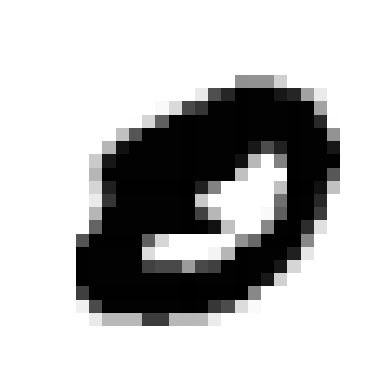

In [6]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[-7]
plot_digit(some_digit)
plt.show()

In [7]:
some_digit.shape

(784,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
y_train_class0 = (y_train == '0')
y_test_class0 = (y_test == '0')

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_class0)

SGDClassifier(random_state=42)

In [12]:
sgd_classifier.predict(some_digit.reshape(1,-1))

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train_class0, cv=3)

array([0.98862857, 0.98857143, 0.98788571])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, cv=3)
y_train_pred.shape

(52500,)

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_class0, y_train_pred)
cm

array([[46965,   346],
       [  265,  4924]])

In [16]:
from sklearn.metrics import precision_score, recall_score

print("Precision score: " + str(precision_score(y_train_class0, y_train_pred)))
print("Recall score: " + str(recall_score(y_train_class0, y_train_pred)))

Precision score: 0.9343453510436432
Recall score: 0.9489304297552515


In [17]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.9489304297552515

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_class0, y_train_pred)

0.9415814131370113

In [19]:
some_digit.shape

(784,)

In [20]:
sgd_classifier.decision_function(some_digit.reshape(1,-1))

array([14769.22821765])

In [21]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, method='decision_function', cv=3)

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_class0, y_train_pred)

Recalls and thresholds return an array with one more value than thresholds

In [48]:
threshold = 20000

In [49]:
idx_for_90_precision = (precisions >= 0.90).argmax()

In [50]:
idx_for_90_precision

46959

In [51]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

-3486.9992657709213

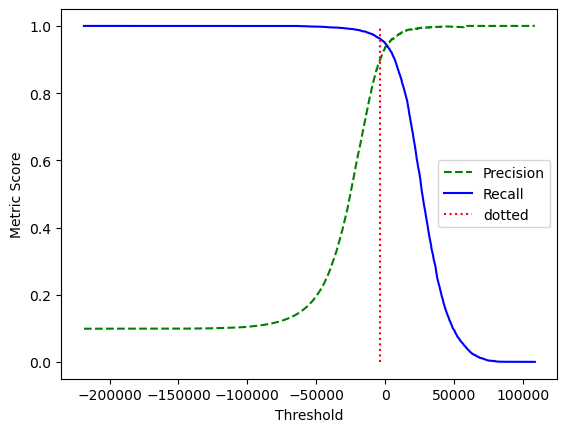

In [52]:
plt.clf()
plt.plot(thresholds, precisions[:-1], "g--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label= "Recall")
plt.vlines(threshold_for_90_precision, 0, 1.0, "r", "dotted", label="dotted")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.show()

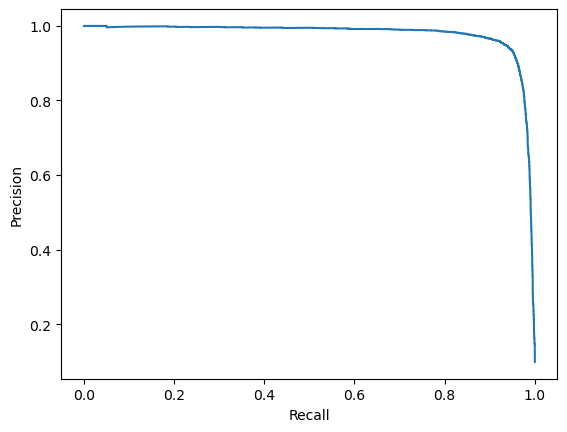

In [53]:
plt.clf()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_class0, y_train_pred)

In [31]:
idx_threshold_90p = (thresholds <= threshold).argmax()
fpr_at_threshold_90 = fpr[idx_threshold_90p]
tpr_at_threshold_90 = tpr[idx_threshold_90p]

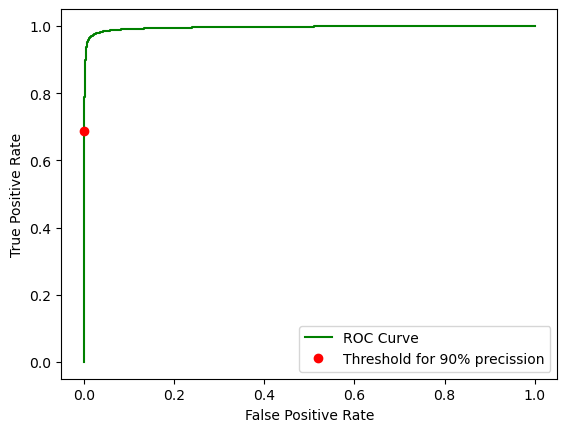

In [54]:
plt.clf()
plt.plot(fpr, tpr, "g-", label="ROC Curve")
plt.plot([fpr_at_threshold_90], [tpr_at_threshold_90], "ro", label="Threshold for 90% precission")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_class0, y_train_pred)

0.9953782570809209

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [56]:
forst_predict_prob = cross_val_predict(forest_clf, X_train, y_train_class0, cv=3, method="predict_proba")

In [57]:
forst_predict_prob[-7:-5]

array([[1., 0.],
       [1., 0.]])

In [58]:
y_scores_forest = forst_predict_prob[:,1]
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train_class0, y_scores_forest)

[]

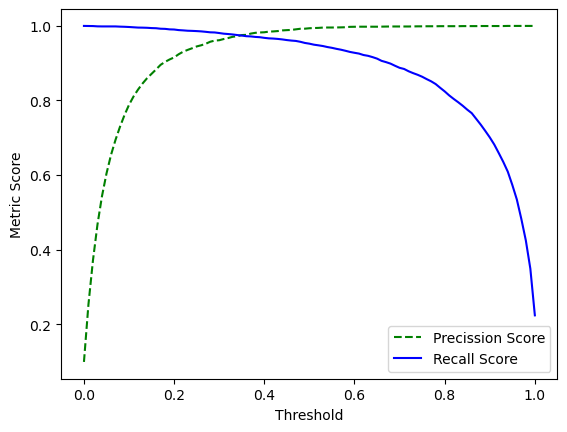

In [60]:
plt.clf()
plt.plot(thresholds_forest, precision_forest[:-1], "g--", label="Precission Score")
plt.plot(thresholds_forest, recall_forest[:-1], "b-", label="Recall Score")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.plot()

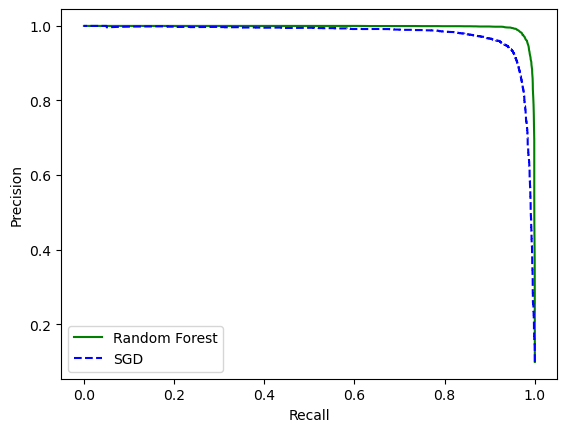

In [61]:
plt.clf()
plt.plot(recall_forest, precision_forest, "g-", label="Random Forest")
plt.plot(recalls, precisions, "b--", label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()